In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import re
import os

In [2]:
#file_path = 'house_data.csv'
file_path = 'tjorn.csv'

In [3]:
#file_path = 'house_data.csv'
file_path = 'tjorn.csv'
#house_data = pd.read_csv('house_data.csv',index_col = 0)
house_data_raw = pd.read_csv(file_path,encoding='utf8', sep=';')

In [4]:
house_data_raw.describe()

,Antal rum,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Tomtarea,address,coordinate,id,map_url,price,sale_date,type,url,Biarea,Avgift/månad,Prisutveckling
count,1957,1985,1968,1948,1847,1968,1922,1987,1988,1988,1988,1988,1988,1988,1988,1208,99,1988
unique,15,341,233,183,1608,1653,1309,1861,1917,1950,2,579,1234,14,1950,155,57,1008
top,4 rum,1 995 000 kr,Boarea,1909,Driftskostnad,Pris per kvadratmeter,Tomtarea,address,coordinate,id,https://maps.googleapis.com/maps/api/js?librar...,price,sale_date,Villa,url,Biarea,Avgift/månad,\n
freq,501,53,39,88,39,39,39,39,39,39,1949,39,39,1383,39,39,39,260


In [5]:
house_data_raw.head()

,Antal rum,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Tomtarea,address,coordinate,id,map_url,price,sale_date,type,url,Biarea,Avgift/månad,Prisutveckling
0,6 rum,3 990 000 kr,139 m2,1975,34 515 kr/år,28 705 kr/m2,1 417 m2,Rösselviksvägen 129,"[57.97751853721622, 11.660685537999111]",1178903,https://maps.googleapis.com/maps/api/js?librar...,3 990 000 kr,Såld 2020-04-30,Villa,/salda/villa-6rum-fagerfjall-tjorns-kommun-ros...,87 m2,NaN,\n
1,5 rum,2 495 000 kr,110 m2,1992,30 800 kr/år,27 500 kr/m2,889 m2,Övre Tådås 33,"[58.031110907300324, 11.579566907726702]",1179223,https://maps.googleapis.com/maps/api/js?librar...,3 025 000 kr,Såld 2020-04-30,Vinterbonat fritidshus,/salda/villa-5rum-tadas-tjorns-kommun-ovre-tad...,150 m2,NaN,\n\n +530 000 kr (+21 %)\n
2,6 rum,3 695 000 kr,133 m2,1924,50 345 kr/år,30 827 kr/m2,3 830 m2,Ödsmåls kyrkväg 10,"[58.10571337187567, 11.841334749923375]",1177875,https://maps.googleapis.com/maps/api/js?librar...,4 100 000 kr,Såld 2020-04-29,Villa,/salda/villa-6rum-odsmal-stenungsunds-kommun-o...,NaN,NaN,\n\n +405 000 kr (+11 %)\n
3,5 rum,5 295 000 kr,174 m2,2016,27 443 kr/år,29 598 kr/m2,1 780 m2,Tveten 145,"[58.043876710212466, 11.909425575863203]",1178051,https://maps.googleapis.com/maps/api/js?librar...,5 150 000 kr,Såld 2020-04-29,Villa,/salda/villa-5rum-spekerod-stenungsunds-kommun...,NaN,NaN,\n\n -145 000 kr (-3 %)\n
4,2 rum,1 790 000 kr,"65,5 m2",1980,4 800 kr/år,29 008 kr/m2,NaN,Kristinedal 75,"[58.06395349165654, 11.83222144399967]",1177734,https://maps.googleapis.com/maps/api/js?librar...,1 900 000 kr,Såld 2020-04-29,Bostadsrättsradhus,/salda/radhus-2rum-kristinedal-stenungsunds-ko...,NaN,3 751 kr/mån,\n\n +110 000 kr (+6 %)\n


In [6]:
regexp_parentisis = re.compile('\(.*\)')

def clean_strings(cell):
    
    if not isinstance(cell,str):
        return cell
    
    s = cell
    s = s.replace('m2','')
    s = s.replace('kr','')
    s = s.replace('rum','')
    s = s.replace('\n','')
    s = s.replace('/','')
    s = s.replace('år','')
    s = s.replace(',','.')
    s = s.replace('Såld ','')
    s = s.replace('mån','')
    
    
    s = regexp_parentisis.sub('',s)
    
    return s
    
    

In [7]:
house_data = house_data_raw.applymap(clean_strings)

In [8]:
house_data.head()

,Antal rum,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Tomtarea,address,coordinate,id,map_url,price,sale_date,type,url,Biarea,Avgift/månad,Prisutveckling
0,6,3 990 000,139,1975,34 515,28 705,1 417,Rösselviksvägen 129,[57.97751853721622. 11.660685537999111],1178903,https:maps.googleapis.commapsapijs?libraries=g...,3 990 000,2020-04-30,Villa,saldavilla-6-fagerfjall-tjorns-kommun-rosselvi...,87,NaN,
1,5,2 495 000,110,1992,30 800,27 500,889,Övre Tådås 33,[58.031110907300324. 11.579566907726702],1179223,https:maps.googleapis.commapsapijs?libraries=g...,3 025 000,2020-04-30,Vinterbonat fritidshus,saldavilla-5-tadas-tjorns-kommun-ovre-tadas-33...,150,NaN,+530 000
2,6,3 695 000,133,1924,50 345,30 827,3 830,Ödsmåls kyrkväg 10,[58.10571337187567. 11.841334749923375],1177875,https:maps.googleapis.commapsapijs?libraries=g...,4 100 000,2020-04-29,Villa,saldavilla-6-odsmal-stenungsunds-kommun-odsmal...,NaN,NaN,+405 000
3,5,5 295 000,174,2016,27 443,29 598,1 780,Tveten 145,[58.043876710212466. 11.909425575863203],1178051,https:maps.googleapis.commapsapijs?libraries=g...,5 150 000,2020-04-29,Villa,saldavilla-5-spekerod-stenungsunds-kommun-tvet...,NaN,NaN,-145 000
4,2,1 790 000,65.5,1980,4 800,29 008,NaN,Kristinedal 75,[58.06395349165654. 11.83222144399967],1177734,https:maps.googleapis.commapsapijs?libraries=g...,1 900 000,2020-04-29,Bostadsrättsradhus,saldaradhus-2-istinedal-stenungsunds-kommun-is...,NaN,3 751,+110 000


In [9]:
numeric_columns = ['Antal rum','Begärt pris','Biarea','Boarea','Byggår','Driftskostnad','Pris per kvadratmeter','Prisutveckling','Tomtarea','price','Avgift/månad']
house_data[numeric_columns].head()

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,price,Avgift/månad
0,6,3 990 000,87,139,1975,34 515,28 705,,1 417,3 990 000,NaN
1,5,2 495 000,150,110,1992,30 800,27 500,+530 000,889,3 025 000,NaN
2,6,3 695 000,NaN,133,1924,50 345,30 827,+405 000,3 830,4 100 000,NaN
3,5,5 295 000,NaN,174,2016,27 443,29 598,-145 000,1 780,5 150 000,NaN
4,2,1 790 000,NaN,65.5,1980,4 800,29 008,+110 000,NaN,1 900 000,3 751


In [10]:
def remove_whitespace(cell):
    
    if not isinstance(cell,str):
        return cell
    
    s = cell.replace(' ','')
    s = cell.replace('+','')
    
    return s
    

def to_number(cell):
    
    if not isinstance(cell,str):
        return cell
    
    try:
        value = float(cell.replace(' ',''))
    except:
        return None
    else:
        return value
    

In [11]:
house_data[numeric_columns] = house_data[numeric_columns].applymap(remove_whitespace)

In [12]:
house_data[numeric_columns] = house_data[numeric_columns].applymap(to_number)

In [13]:
date_regexp = re.compile('(\d\d\d\d-\d\d-\d\d)')
def find_date(date_string):
    
    if not isinstance(date_string,str):
        return None
    
    else:
        result = date_regexp.search(date_string)
        if result:
            return result.group(1)
        else:
            return None


In [14]:
house_data['sale_date'] = house_data['sale_date'].apply(func = find_date)

In [15]:
musts = ['Boarea','Pris per kvadratmeter','price']

mask = house_data[musts].notnull().all(axis = 1)
house_data = house_data.loc[mask]
house_data.fillna(0,inplace = True)

In [16]:
house_data.describe()

,Antal rum,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Tomtarea,price,Biarea,Avgift/månad,Prisutveckling
count,1929.000000,1.929000e+03,1929.000000,1.929000e+03,1929.000000,1929.000000,1929.000000,1.929000e+03,1929.000000,1929.000000,1.929000e+03
mean,4.791861,2.910168e+06,114.497408,3.026419e+08,28027.036807,28209.997408,2797.392379,3.060725e+06,31.973354,166.527735,1.132427e+05
std,1.522171,1.718449e+06,42.165105,7.666375e+09,12574.389348,15075.463301,12874.693422,1.696094e+06,39.385083,985.564356,3.359151e+05
min,0.000000,0.000000e+00,25.000000,0.000000e+00,0.000000,2278.000000,0.000000,2.000000e+05,0.000000,0.000000,-5.000000e+06
25%,4.000000,1.850000e+06,84.000000,1.961000e+03,21257.000000,19158.000000,682.000000,1.975000e+06,0.000000,0.000000,-3.500000e+04
50%,5.000000,2.550000e+06,111.000000,1.973000e+03,29398.000000,25217.000000,1070.000000,2.705000e+06,15.000000,0.000000,5.500000e+04
75%,6.000000,3.560000e+06,140.000000,1.988000e+03,36334.000000,33333.000000,1710.000000,3.750000e+06,55.000000,0.000000,2.750000e+05
max,12.000000,2.400000e+07,436.700000,1.969200e+11,82600.000000,203571.000000,230000.000000,2.200000e+07,192.000000,8627.000000,9.850000e+05


In [17]:
house_data['Antal rum'].unique()

array([ 6. ,  5. ,  2. ,  4. ,  3. , 12. ,  7. ,  0. ,  8. ,  9. ,  1. ,
       10. ,  2.5,  3.5])

In [18]:
house_data[numeric_columns] = house_data[numeric_columns].astype(float)

In [19]:
house_data['sale_date'] = pd.to_datetime(house_data['sale_date'])

In [20]:
price_max = house_data['price'].quantile(0.9999)
price_min = house_data['price'].quantile(0.0001)

price_m2_max = house_data['Pris per kvadratmeter'].quantile(0.995)
price_m2_min = house_data['Pris per kvadratmeter'].quantile(0.001)


mask = ((house_data['price'] > price_min) & (house_data['price'] < price_max) &
       (house_data['Pris per kvadratmeter'] > price_m2_min) & (house_data['Pris per kvadratmeter'] < price_m2_max)
       )
house_data_clean = house_data.loc[mask].copy()

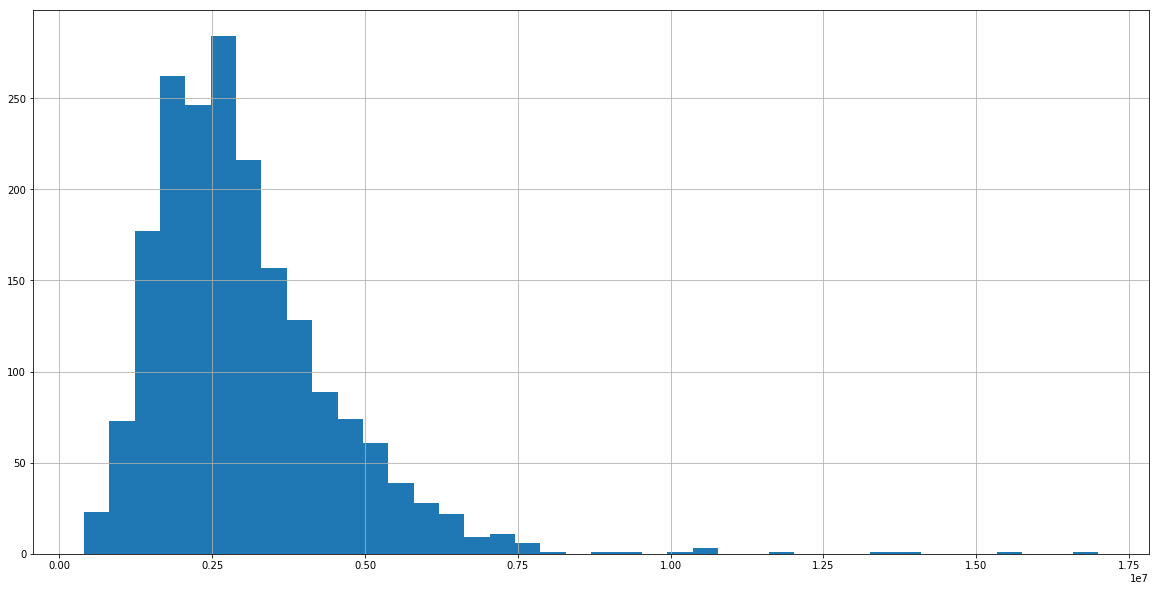

In [21]:
fig,ax = plt.subplots()
house_data_clean['price'].hist(bins = 40,ax = ax)

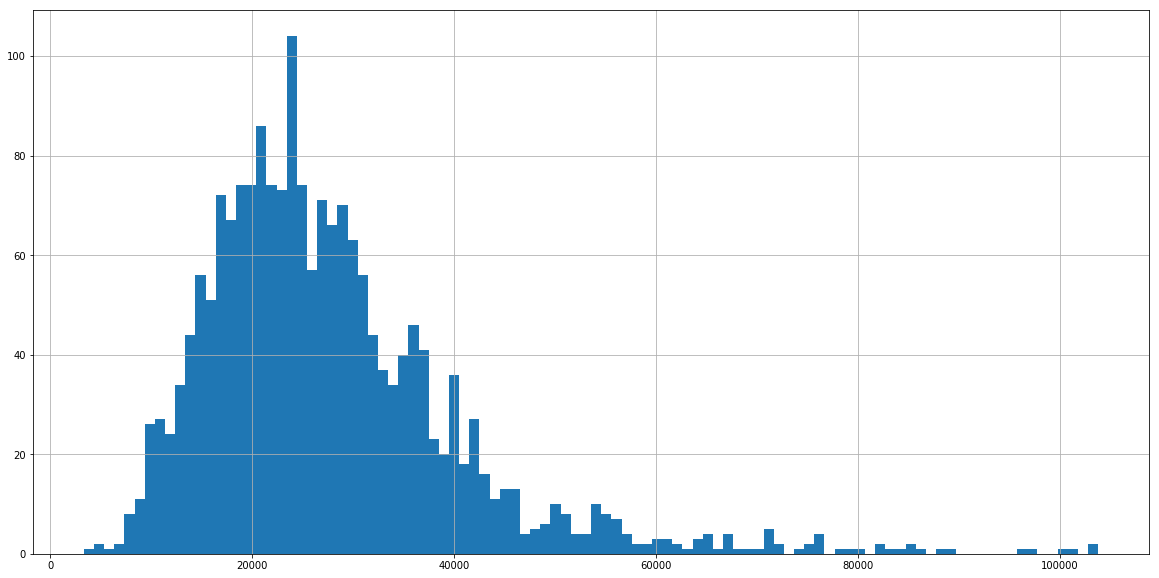

In [22]:
fig,ax = plt.subplots()
house_data_clean['Pris per kvadratmeter'].hist(bins = 100,ax = ax)

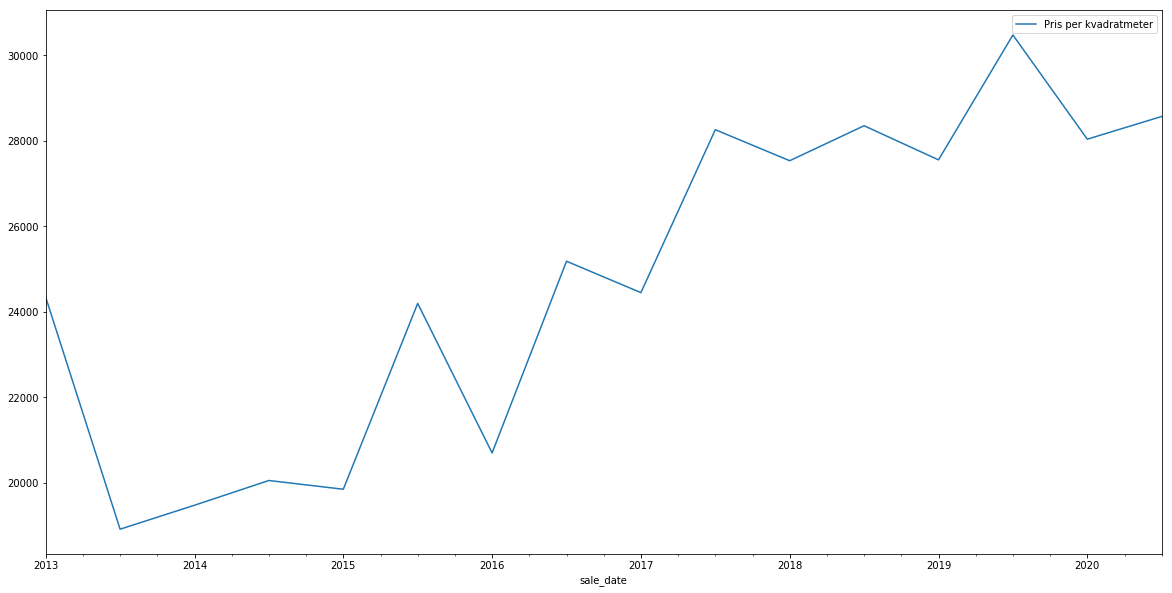

In [73]:
fig,ax = plt.subplots()
#mask = house_data['Pris per kvadratmeter'] < 70000
house_data_ = house_data_clean.set_index('sale_date')

house_data_.resample('6M').median().plot(y = 'Pris per kvadratmeter',ax = ax,alpha=1)

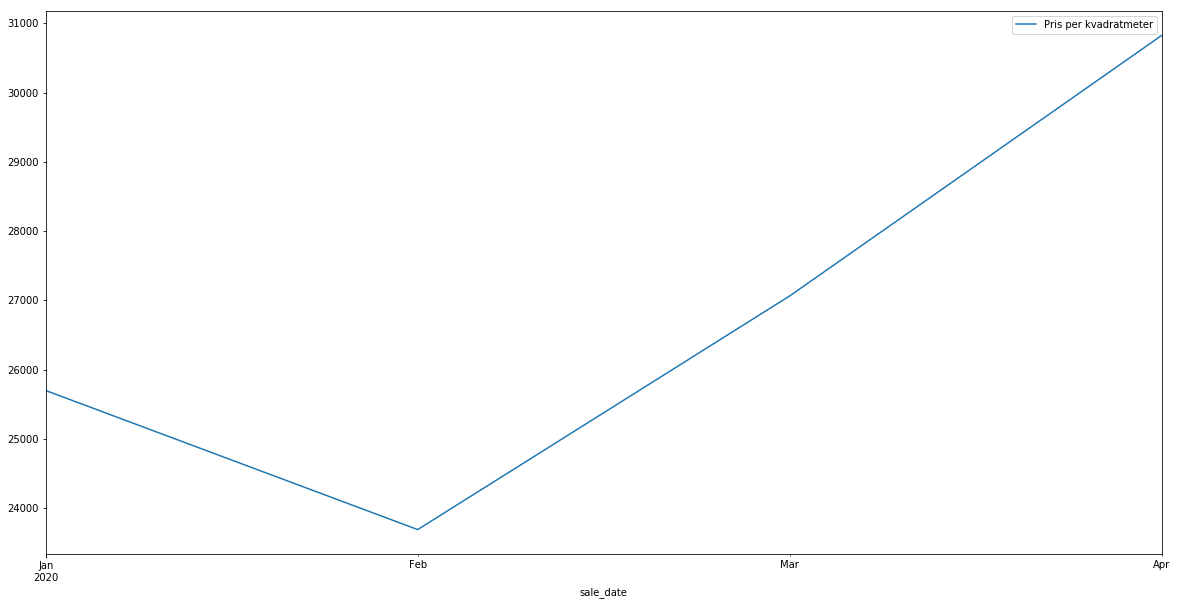

In [53]:
fig,ax = plt.subplots()
mask = house_data_.index > '2020-01-01'
house_data_2020 = house_data_.loc[mask].copy()
house_data_2020.resample('1M').median().plot(y = 'Pris per kvadratmeter',ax = ax,alpha=1)

In [54]:
house_data_2020.describe()

,Antal rum,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Tomtarea,price,Biarea,Avgift/månad,Prisutveckling
count,107.000000,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02,107.000000,107.000000,107.000000
mean,4.682243,3.066402e+06,113.107477,1934.018692,30532.261682,29817.233645,1714.373832,3.171280e+06,35.028037,226.112150,104785.046729
std,1.593608,1.261464e+06,38.018679,269.511297,14597.325430,11489.251502,2837.658593,1.194545e+06,41.727883,1192.249494,299160.682137
min,0.000000,8.500000e+05,42.000000,0.000000,0.000000,13527.000000,0.000000,1.400000e+06,0.000000,0.000000,-800000.000000
25%,4.000000,2.295000e+06,84.000000,1962.000000,24710.500000,22448.000000,729.000000,2.400000e+06,0.000000,0.000000,-80000.000000
50%,5.000000,2.895000e+06,114.000000,1973.000000,33500.000000,27465.000000,1065.000000,2.850000e+06,16.000000,0.000000,80000.000000
75%,6.000000,3.695000e+06,137.500000,1987.500000,40201.500000,36160.500000,1509.000000,3.775000e+06,64.500000,0.000000,240000.000000
max,12.000000,8.250000e+06,201.000000,2020.000000,58331.000000,89041.000000,25851.000000,7.800000e+06,150.000000,8131.000000,900000.000000


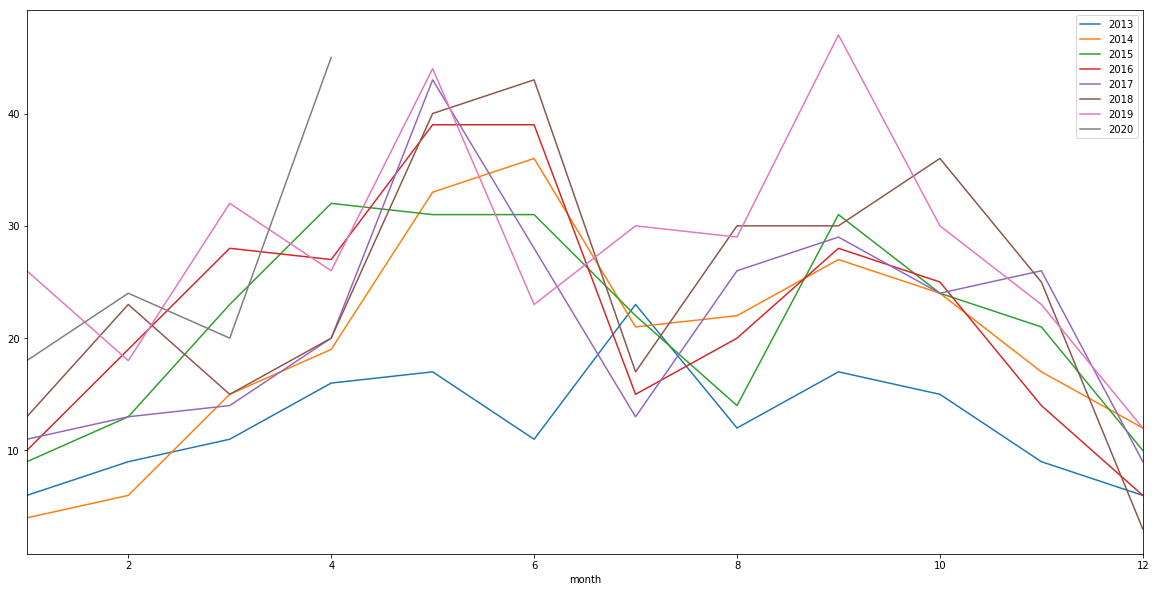

In [68]:
fig,ax=plt.subplots()
house_data_['year']=house_data_.index.year

for year, group in house_data_.groupby(by='year'):
    agg=group.resample('1M').count()
    agg['month']=agg.index.month
    agg.plot(x='month',y = 'Pris per kvadratmeter',ax = ax,alpha=1, label=year)

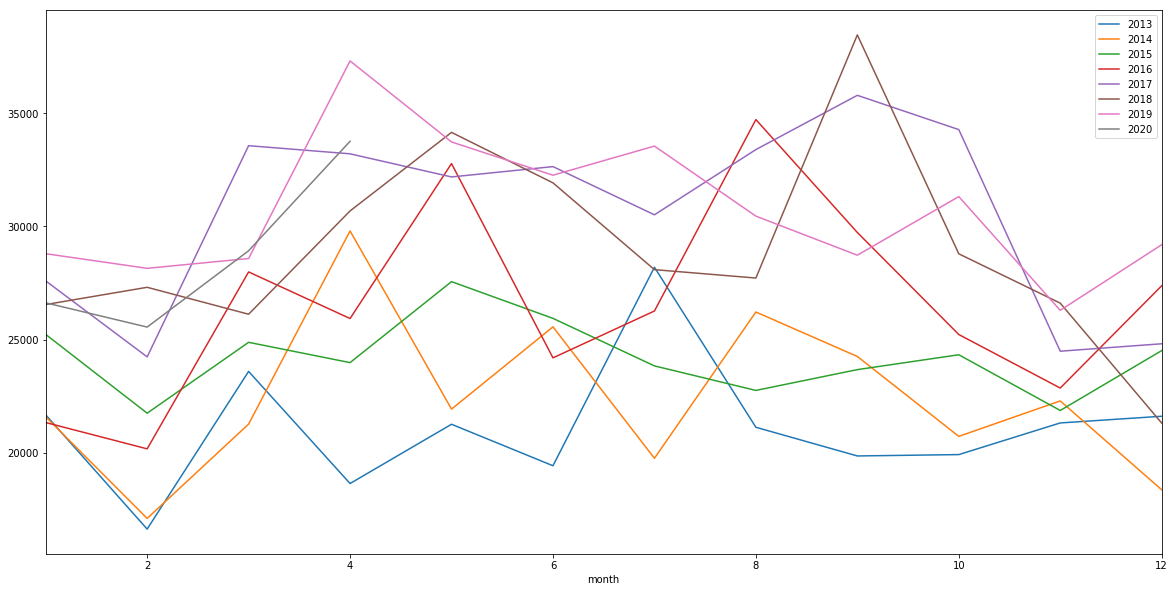

In [69]:
fig,ax=plt.subplots()
house_data_['year']=house_data_.index.year

for year, group in house_data_.groupby(by='year'):
    agg=group.resample('1M').mean()
    agg['month']=agg.index.month
    agg.plot(x='month',y = 'Pris per kvadratmeter',ax = ax,alpha=1, label=year)

In [62]:
house_data_.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
           dtype='int64', name='sale_date', length=1917)

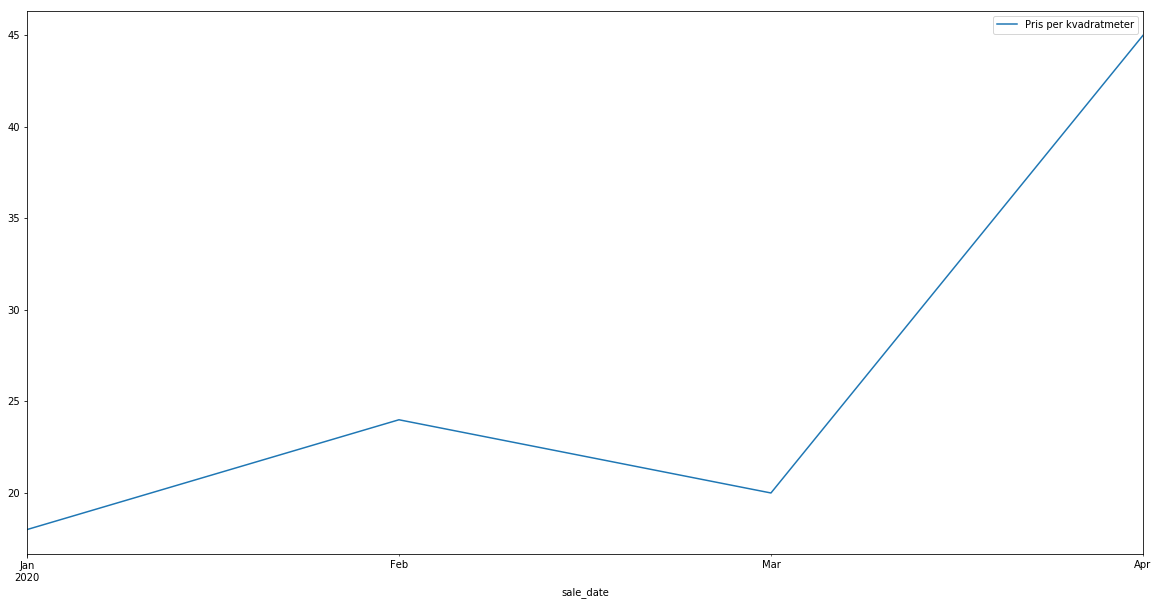

In [59]:
fig,ax=plt.subplots()
house_data_2020.resample('1M').count().plot(y = 'Pris per kvadratmeter',ax = ax,alpha=1)

In [24]:
name,ext = os.path.splitext(file_path)
new_name = '%s_clean_no_coordinates%s' % (name,ext)
house_data_clean.to_csv(new_name,index = False)

In [25]:
regexp_coordinates = re.compile('\[(.*)\,(.*)\]')
def get_lat_lon(coordinate_string):

    result = regexp_coordinates.search(coordinate_string)
    if not result:
        lat = None
        lon = None
    else:
        lat = float(result.group(1))
        lon = float(result.group(2))

    s = pd.Series()
    s['lat'] = lat
    s['lon'] = lon

    return s

In [26]:
house_data_clean.describe()

,Antal rum,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Tomtarea,price,Biarea,Avgift/månad,Prisutveckling
count,1917.000000,1.917000e+03,1917.000000,1.917000e+03,1917.000000,1917.000000,1917.000000,1.917000e+03,1917.000000,1917.000000,1.917000e+03
mean,4.794471,2.864366e+06,114.602087,2.047347e+08,28068.509129,27710.230047,2711.276161,3.016540e+06,32.072300,163.069901,1.172615e+05
std,1.517559,1.525596e+06,42.108074,6.331483e+09,12533.821521,13019.815714,12229.327776,1.513798e+06,39.453757,969.479546,3.185207e+05
min,0.000000,0.000000e+00,30.000000,0.000000e+00,0.000000,3346.000000,0.000000,4.000000e+05,0.000000,0.000000,-5.000000e+06
25%,4.000000,1.850000e+06,85.000000,1.961000e+03,21300.000000,19143.000000,686.000000,1.975000e+06,0.000000,0.000000,-3.500000e+04
50%,5.000000,2.500000e+06,111.000000,1.973000e+03,29404.000000,25210.000000,1073.000000,2.700000e+06,15.000000,0.000000,5.500000e+04
75%,6.000000,3.500000e+06,140.000000,1.988000e+03,36334.000000,33291.000000,1707.000000,3.710000e+06,55.000000,0.000000,2.750000e+05
max,12.000000,1.800000e+07,436.700000,1.969200e+11,82600.000000,103846.000000,230000.000000,1.700000e+07,192.000000,8234.000000,9.850000e+05


In [27]:
coordinates = house_data_clean['coordinate'].apply(func = get_lat_lon)
house_data_clean = pd.concat((house_data_clean,coordinates),axis = 1)

In [28]:
#mask = (house_data_clean['lat'].notnull() & house_data_clean['lon'].notnull())
#house_data_clean = house_data_clean.loc[mask]

In [29]:
name,ext = os.path.splitext(file_path)
new_name = '%s_clean%s' % (name,ext)

In [30]:
house_data_clean.to_csv(new_name,index = False)

In [33]:
3*10**6/81

37037.03703703704